## Analysis of geolocation sample dataset

We analyze the dataset

https://github.com/EQWorks/ws-data-spark/tree/master/data

with the instruction

https://gist.github.com/woozyking/f1d50e1fe1b3bf52e3748bc280cf941f

In [1]:
# Importing libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

### Importing the dataset

In [2]:
# Importing the list of 'Points of Insteret'.
poi = pd.read_csv('POIList.csv')
poi

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [3]:
poi.columns

Index(['POIID', ' Latitude', 'Longitude'], dtype='object')

In [4]:
# Clean column names and drop the duplicated POI.
poi.rename(columns={' Latitude': 'Latitude'}, inplace=True)
poi.drop_duplicates(subset = ['Latitude', 'Longitude'], inplace=True)
poi

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [5]:
# POI0 = (53.546167, -113.485734)
# POI1 = (45.521629, -73.566024)
# POI2 = (45.224830, -63.232729)

# POIs = (POI0, POI1, POI2)

# Create a list of POIs.
poi['Position'] = tuple(zip(poi['Latitude'], poi['Longitude']))
POIs = list(poi['Position'])
POIs

[(53.546167000000004, -113.48573400000001),
 (45.521629, -73.566024),
 (45.22483, -63.232729000000006)]

In [6]:
data = pd.read_csv('DataSample.csv')
data

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22021,5614888,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22025 entries, 0 to 22024
Data columns (total 7 columns):
_ID          22025 non-null int64
 TimeSt      22025 non-null object
Country      22025 non-null object
Province     22025 non-null object
City         22025 non-null object
Latitude     22025 non-null float64
Longitude    22025 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
data.columns

Index(['_ID', ' TimeSt', 'Country', 'Province', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [9]:
data.rename(columns = {'_ID': 'ID', ' TimeSt': 'TimeSt'}, inplace=True)
data['TimeSt'].astype(str)

0        2017-06-21 00:00:00.143
1        2017-06-21 18:00:00.193
2        2017-06-21 15:00:00.287
3        2017-06-21 15:00:00.307
4        2017-06-21 15:00:00.497
                  ...           
22020    2017-06-21 12:23:07.880
22021    2017-06-21 08:23:01.793
22022    2017-06-21 00:23:07.903
22023    2017-06-21 11:23:07.953
22024    2017-06-21 17:23:08.033
Name: TimeSt, Length: 22025, dtype: object

In [10]:
data['Country'].astype(str)
data['Country'].value_counts()

CA    22025
Name: Country, dtype: int64

In [11]:
data['Province'].astype(str)
data['Province'].value_counts()

ON    9321
AB    8554
QC    1534
BC     881
SK     868
MB     346
NB     249
NS     200
NL      63
NT       5
YT       3
PE       1
Name: Province, dtype: int64

In [12]:
# Dropping duplicates with the same 'TimeSt', 'Latitude' and 'Longitude'.
data.drop_duplicates(subset = ['TimeSt','Latitude', 'Longitude'], keep='first', inplace=True)
# data.drop_duplicates(subset = ['TimeSt', 'Country', 'Province', 'City', 'Latitude', 'Longitude'], keep='first', inplace=True)
# data.drop_duplicates(subset = ['TimeSt','Latitude', 'Longitude'], keep=False, inplace=True)
data

,ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22019,5614760,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [13]:
def nearest_POI(req: tuple) -> tuple:
    '''
    Input: As a tuple, the location of the request, (lattitude, longitude)
    Output: As a series, the index and the distance of the nearest POI.
    '''
    DISTs = []
    for poi in POIs:
        DISTs.append(geopy.distance.distance(req, poi).km)
    min_dist = min(DISTs)
    ind = DISTs.index(min_dist)
    return pd.Series([ind, min_dist])

In [14]:
# Create a new column 'Position' by combining 'Latitude' and 'Longtude'.
data['Position'] = tuple(zip(data['Latitude'], data['Longitude']))

# Create two new columns:
# 'Nearest_POI' is the label of the nearest POI.
# 'Distance' is the distance from the request to the nearest POI.
data[['Nearest_POI', 'Distance']] = data['Position'].apply(nearest_POI)
data

,ID,TimeSt,Country,Province,City,Latitude,Longitude,Position,Nearest_POI,Distance
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,"(43.49347, -80.49123)",1.0,594.764453
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,"(42.9399, -81.2709)",1.0,678.755025
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,"(43.5776, -80.2201)",1.0,570.947304
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,"(43.3716, -80.9773)",1.0,636.181718
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,"(43.3716, -80.9773)",1.0,636.181718
...,...,...,...,...,...,...,...,...,...,...
22019,5614760,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621,"(51.02093, -114.10621)",0.0,284.159333
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560,"(43.1644, -79.2456)",1.0,523.007821
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220,"(43.8873, -78.9422)",1.0,463.037698
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260,"(43.4934, -79.7126)",1.0,538.037550


In [15]:
# Recast 'Nearest_POI' as 'int'
data['Nearest_POI'] = data['Nearest_POI'].astype(int)
data['Nearest_POI'].value_counts()

1    9796
0    9726
2     477
Name: Nearest_POI, dtype: int64

In [16]:
data.sort_values(by='Distance', inplace=True)
data = data.reset_index().drop(columns='index')
data.tail(30)

,ID,TimeSt,Country,Province,City,Latitude,Longitude,Position,Nearest_POI,Distance
19969,5366246,2017-06-21 03:59:52.367,CA,ON,Fort Frances,48.61160,-93.39760,"(48.6116, -93.3976)",0,1504.641878
19970,4937501,2017-06-21 09:30:37.050,CA,ON,Fort Frances,48.61160,-93.39760,"(48.6116, -93.3976)",0,1504.641878
19971,4667727,2017-06-21 08:08:43.243,CA,ON,Fort Frances,48.61140,-93.37824,"(48.6114, -93.37824)",0,1505.901885
19972,4667124,2017-06-21 01:08:43.243,CA,ON,Fort Frances,48.61140,-93.37824,"(48.6114, -93.37824)",0,1505.901885
19973,4786763,2017-06-21 21:17:39.690,CA,ON,Fort Frances,48.62170,-93.35970,"(48.6217, -93.3597)",0,1506.544588
19974,5081161,2017-06-21 06:39:29.917,CA,YT,Whitehorse,60.70929,-135.03054,"(60.70929, -135.03054)",0,1518.766974
19975,5057662,2017-06-21 04:37:48.457,CA,YT,Whitehorse,60.70929,-135.03054,"(60.70929, -135.03054)",0,1518.766974
19976,4748303,2017-06-21 19:15:09.123,CA,YT,Pelly Crossing,62.82730,-136.53957,"(62.8273, -136.53957)",0,1689.530348
19977,5215632,2017-06-21 05:49:04.917,CA,ON,Toronto,51.29930,9.49100,"(51.2993, 9.491)",2,5217.056426
19978,5373264,2017-06-21 02:00:23.357,CA,ON,Toronto,48.73082,9.24356,"(48.73082, 9.24356)",2,5315.637692


In [17]:
# Starting with the 19977th row, the location is actually not in Canada.
# We remove these suspicious requsts.
data = data[:19977]
data

,ID,TimeSt,Country,Province,City,Latitude,Longitude,Position,Nearest_POI,Distance
0,5039366,2017-06-21 04:36:43.390,CA,AB,Edmonton,53.54636,-113.48047,"(53.54636, -113.48047)",0,0.349594
1,4985299,2017-06-21 20:33:20.343,CA,AB,Edmonton,53.54280,-113.49020,"(53.5428, -113.4902)",0,0.477569
2,4675885,2017-06-21 04:09:23.340,CA,AB,Edmonton,53.54270,-113.49027,"(53.5427, -113.49027)",0,0.489189
3,4867861,2017-06-21 04:24:38.690,CA,AB,Edmonton,53.54263,-113.49032,"(53.54263, -113.49032)",0,0.497377
4,4865543,2017-06-21 08:24:26.510,CA,AB,Edmonton,53.54263,-113.49032,"(53.54263, -113.49032)",0,0.497377
...,...,...,...,...,...,...,...,...,...,...
19972,4667124,2017-06-21 01:08:43.243,CA,ON,Fort Frances,48.61140,-93.37824,"(48.6114, -93.37824)",0,1505.901885
19973,4786763,2017-06-21 21:17:39.690,CA,ON,Fort Frances,48.62170,-93.35970,"(48.6217, -93.3597)",0,1506.544588
19974,5081161,2017-06-21 06:39:29.917,CA,YT,Whitehorse,60.70929,-135.03054,"(60.70929, -135.03054)",0,1518.766974
19975,5057662,2017-06-21 04:37:48.457,CA,YT,Whitehorse,60.70929,-135.03054,"(60.70929, -135.03054)",0,1518.766974


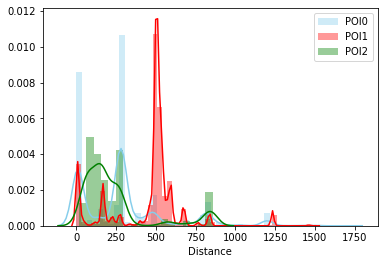

In [18]:
# We create a visualization of the 'Distance', grouped by 'Nearest_POI'
# Recall that 'Distance' is the distance from the request to the nearest POI.

sns.distplot(data[data['Nearest_POI']==0]['Distance'], color='skyblue', label='POI0')
sns.distplot(data[data['Nearest_POI']==1]['Distance'], color='red', label='POI1')
sns.distplot(data[data['Nearest_POI']==2]['Distance'], color='green', label='POI2')
plt.legend()
plt.show()

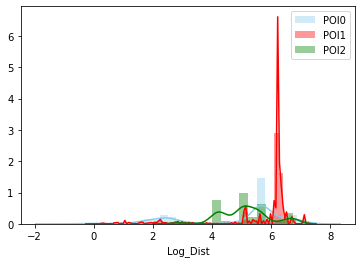

In [24]:
# To create a different visualization of 'Distance' column, we create a new column 'Log_Dist' by taking its logarithm.
data['Log_Dist'] = data['Distance'].apply(math.log)

# We create a visualization of the 'Log_Dist', grouped by 'Nearest_POI'
sns.distplot(data[data['Nearest_POI']==0]['Log_Dist'], color='skyblue', label='POI0')
sns.distplot(data[data['Nearest_POI']==1]['Log_Dist'], color='red', label='POI1')
sns.distplot(data[data['Nearest_POI']==2]['Log_Dist'], color='green', label='POI2')
plt.legend()
plt.show()

In [20]:
# Grouped by the nearest POI, we aggregate the statistics of 'Distance'.

stats = data.groupby('Nearest_POI')['Distance'].mean().to_frame().rename(columns = {'Distance': 'Mean'}).join(
    [
        data.groupby('Nearest_POI')['Distance'].std().to_frame().rename(columns = {'Distance': 'Std'}),
        data.groupby('Nearest_POI')['Distance'].max().to_frame().rename(columns = {'Distance': 'Max_Dist'}),
        data.groupby('Nearest_POI')['Distance'].count().to_frame().rename(columns = {'Distance': 'Count'})
    ]
    )
stats

,Mean,Std,Max_Dist,Count
Nearest_POI,,,,
0,294.307485,285.694889,1689.530348,9719
1,452.659418,224.123122,1500.453242,9796
2,238.820552,225.296156,857.254779,462


In [21]:
# We calculate the density of requests, i.e. the number of requests per sq km.
# The area is the disk with radius being maximum distance.
stats['Density'] = stats['Count']/(math.pi*stats['Max_Dist']**2)
stats

,Mean,Std,Max_Dist,Count,Density
Nearest_POI,,,,,
0,294.307485,285.694889,1689.530348,9719,0.001084
1,452.659418,224.123122,1500.453242,9796,0.001385
2,238.820552,225.296156,857.254779,462,0.000200


In [22]:
# We rank the POIs by 'Density'.
stats = stats.sort_values('Density').reset_index().reset_index().rename(columns={'index':'Scale'})
stats

,Scale,Nearest_POI,Mean,Std,Max_Dist,Count,Density
0,0,2,238.820552,225.296156,857.254779,462,0.000200
1,1,0,294.307485,285.694889,1689.530348,9719,0.001084
2,2,1,452.659418,224.123122,1500.453242,9796,0.001385


In [23]:
# Finally, we convert the rank of POI by its density into a linear scale from -10 to 10.
stats['Scale'] = stats['Scale']*20 / (stats.shape[0] - 1) - 10
stats

,Scale,Nearest_POI,Mean,Std,Max_Dist,Count,Density
0,-10.0,2,238.820552,225.296156,857.254779,462,0.000200
1,0.0,0,294.307485,285.694889,1689.530348,9719,0.001084
2,10.0,1,452.659418,224.123122,1500.453242,9796,0.001385


In the absence of large quantity of data, this simple model of the linear scale of the rank ensures that the POIs are uniformly distributed from -10 to 10.

This is desirable for the following reason. Say, we have 10000 POIs which are Gaussian distributed. If we just scale them according to their density of requests, then most the POIs will tend to cluster around the average. But the linear scale of the rank will not have this problem.

If we have more data, there is probably room for much better model.